In [60]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv("../data/Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
len(df)

30

In [5]:
df.isna().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

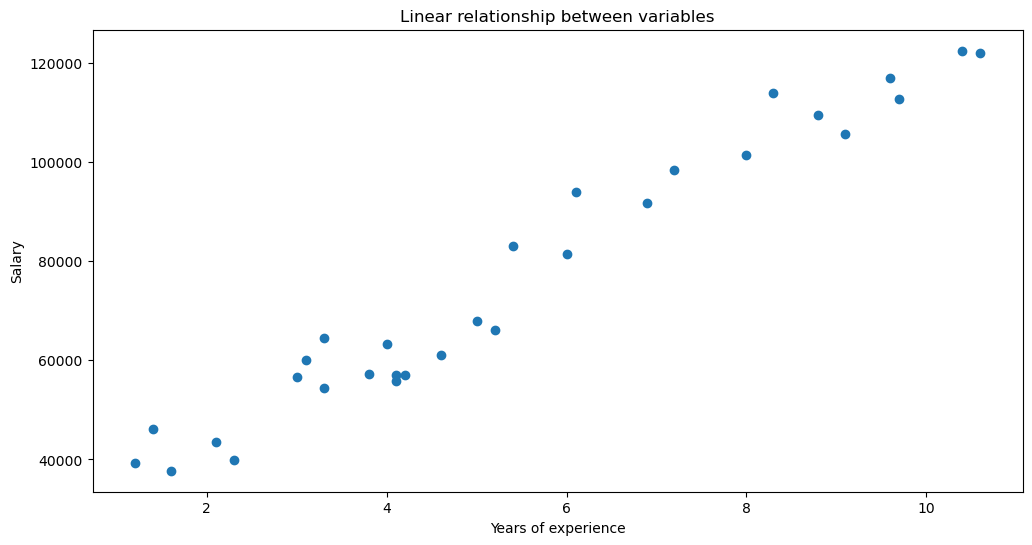

In [18]:
plt.figure(figsize=(12, 6))
plt.title("Linear relationship between variables")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.scatter(df.YearsExperience, df.Salary);

In [20]:
df = df[["YearsExperience", "Salary"]]

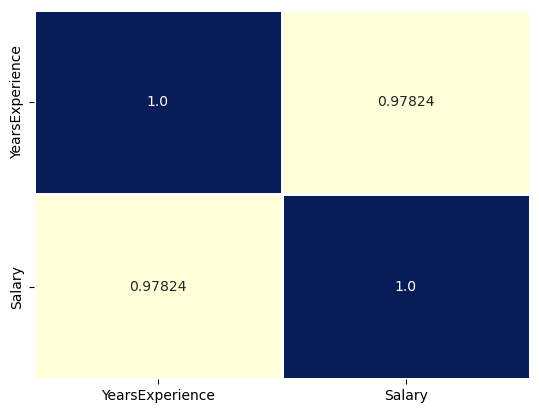

In [33]:
sn.heatmap(round(df.corr(), 5), annot=True, fmt="", linewidths=0.9, cbar=False, cmap="YlGnBu");

### Scatterplot:
The blue dots represent individual data points.
Each dot corresponds to an employee’s years of experience (x-axis) and their corresponding salary (y-axis).
As years of experience increase, salaries generally tend to increase.
### Regression Line:
The blue line represents the linear regression model fit to the data.
It estimates the average salary increase associated with each additional year of experience.
The positive slope of the line indicates that, on average, salaries rise as experience grows.
### Strength of Relationship:
The closer the data points align to the regression line, the stronger the linear relationship.
In this case, the data points cluster around the line, suggesting a moderate positive correlation.

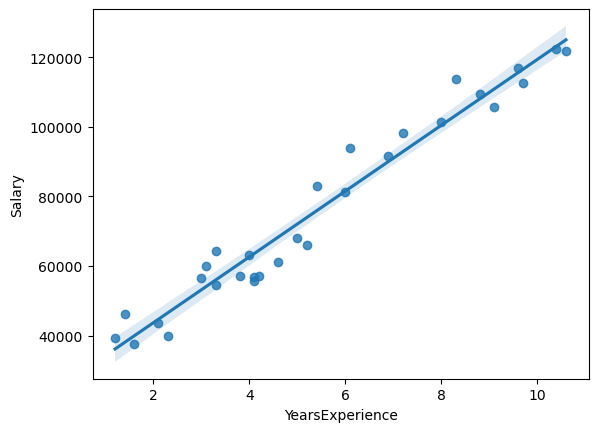

In [37]:
sn.regplot(data=df, x = df.YearsExperience, y=df.Salary, scatter=True, fit_reg=True);

In [54]:
X = np.array(df.YearsExperience).reshape(-1, 1)
y = np.array(df.Salary).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
regr = LinearRegression().fit(X_train, y_train)
regr.score(X_test, y_test)

0.9117978301054694

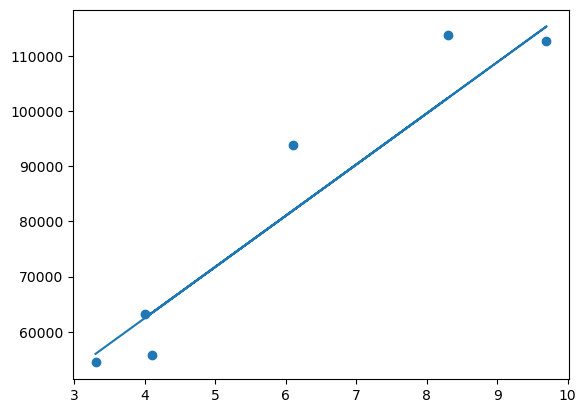

In [59]:
y_preds = regr.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_preds);

In [63]:
score_dict = {
    "MAE": mean_absolute_error(y_test, y_preds),
    "MSE": mean_squared_error(y_test, y_preds),
    "R2": r2_score(y_test, y_preds)
}

score_dict

{'MAE': 6007.498534972146, 'MSE': 57203508.925492145, 'R2': 0.9117978301054694}